<a href="https://colab.research.google.com/github/MichaelTRArruda/Consultas_procedimentos_saude_PCR/blob/main/Dados_UBS_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1></H1>
<center><H1><B>Prefeitura do Recife</B></H1></center>
<center><H2><B>Secretaria de Saúde</B></H2></center>
<center><H3><B>Consultas e Procedimentos - 2023</B></H3></center>

<H3><B>1 - Carregar a base de dados das Unidades de Saúde</H3></B>

In [66]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/MichaelTRArruda/Consultas_procedimentos_saude_PCR/47f4a1499aab4b045bde0473e269af27be7f59e7/Consultas_Procedimentos_2023.csv", encoding = "UTF-8", engine='python')

#Tratando dados da coluna endereço
df['endereco'] = df['endereco'].str.replace(' - ', ',', regex=False)
df['endereco'] = df['endereco'].str.replace('.', ',', regex=False)
df['endereco'] = df['endereco'].str.replace('A CEP', 'A, CEP', regex=False)
df['endereco'] = df['endereco'].str.replace('ACEP', 'A, CEP', regex=False)
df['endereco'] = df['endereco'].str.replace('B CEP', 'B, CEP', regex=False)
df['endereco'] = df['endereco'].str.replace('BCEP', 'B, CEP', regex=False)
df['endereco'] = df['endereco'].str.replace('E CEP', 'E, CEP', regex=False)
df['endereco'] = df['endereco'].str.replace('e CEP', 'e, CEP', regex=False)
df['endereco'] = df['endereco'].str.replace('I CEP', 'I, CEP', regex=False)
df['endereco'] = df['endereco'].str.replace('O CEP', 'O, CEP', regex=False)
df['endereco'] = df['endereco'].str.replace('U CEP', 'U, CEP', regex=False)

df.head()

,_id,ine,equipe,cnes,usf,endereco,especialidade,consultas,tipo,procedimentos,atencao,periodo
0,1,153168,Coque I,1252,US 218 PSF COQUE,"Rua Guapirama, 65, Ilha Joana Bezerra, CEP:500...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",2934,"Consulta Médica, Consulta Enfermagem, Consulta...",4925.0,Atenção Básica,Janeiro a Dezembro 2023
1,2,153184,Coque II,1252,US 218 PSF COQUE,"Rua Guapirama, 65, Ilha Joana Bezerra, CEP:500...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",3257,"Consulta Médica, Consulta Enfermagem, Consulta...",4812.0,Atenção Básica,Janeiro a Dezembro 2023
2,3,153176,Coque III,1252,US 218 PSF COQUE,"Rua Guapirama, 65, Ilha Joana Bezerra, CEP:500...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",3495,"Consulta Médica, Consulta Enfermagem, Consulta...",5901.0,Atenção Básica,Janeiro a Dezembro 2023
3,4,1555553,Coque IV,1252,US 218 PSF COQUE,"Rua Guapirama, 65, Ilha Joana Bezerra, CEP:500...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",2577,"Consulta Médica, Consulta Enfermagem, Consulta...",4653.0,Atenção Básica,Janeiro a Dezembro 2023
4,5,153559,Santa Terezinha I,22187,US 232 PSF ILHA SANTA TEREZINHA,"Rua Artemis, 09,Santo Amaro,CEP51110470","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",3595,"Consulta Médica, Consulta Enfermagem, Consulta...",4130.0,Atenção Básica,Janeiro a Dezembro 2023


<H3><B>2 - Remove colunas vazias</B></H3>

In [67]:
print(df.isnull().sum())

#remove colunas com ao menos 70% de dados ausentes
df = df.dropna(thresh=0.7*len(df), axis=1)

_id               0
ine              20
equipe           20
cnes              0
usf               0
endereco          0
especialidade     4
consultas        17
tipo              8
procedimentos    21
atencao           8
periodo           8
dtype: int64


<H3><B>3 - Separando os dados de endereço</B></H3>

In [68]:
# Divida a coluna 'endereco' em no máximo 4 partes para lidar com formatos inconsistentes.
split_address = df['endereco'].str.split(',', expand=True, n=3)

# Atribuir as partes divididas a novas colunas, lidando com casos em que há menos de 4 partes
df['rua'] = split_address[0]
df['numero'] = split_address[1] if 1 in split_address.columns else None
df['bairro'] = split_address[2] if 2 in split_address.columns else None
df['cep'] = split_address[3] if 3 in split_address.columns else None

# Filtrar as linhas onde a coluna 'bairro' começa com 'CEP', 'KM', '1', '4', 'S/N' após remover espaços em branco
df = df[~df['bairro'].astype(str).str.strip().str.startswith('CEP', na=False)]
df = df[~df['bairro'].astype(str).str.strip().str.startswith('Cep', na=False)]
df = df[~df['bairro'].astype(str).str.strip().str.startswith('KM', na=False)]
df = df[~df['bairro'].astype(str).str.strip().str.startswith('1', na=False)]
df = df[~df['bairro'].astype(str).str.strip().str.startswith('4', na=False)]
df = df[~df['bairro'].astype(str).str.strip().str.startswith('S/N', na=False)]

display(df.head())

,_id,ine,equipe,cnes,usf,endereco,especialidade,consultas,tipo,procedimentos,atencao,periodo,rua,numero,bairro,cep
0,1,153168,Coque I,1252,US 218 PSF COQUE,"Rua Guapirama, 65, Ilha Joana Bezerra, CEP:500...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",2934,"Consulta Médica, Consulta Enfermagem, Consulta...",4925.0,Atenção Básica,Janeiro a Dezembro 2023,Rua Guapirama,65,Ilha Joana Bezerra,CEP:50080-730
1,2,153184,Coque II,1252,US 218 PSF COQUE,"Rua Guapirama, 65, Ilha Joana Bezerra, CEP:500...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",3257,"Consulta Médica, Consulta Enfermagem, Consulta...",4812.0,Atenção Básica,Janeiro a Dezembro 2023,Rua Guapirama,65,Ilha Joana Bezerra,CEP:50080-730
2,3,153176,Coque III,1252,US 218 PSF COQUE,"Rua Guapirama, 65, Ilha Joana Bezerra, CEP:500...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",3495,"Consulta Médica, Consulta Enfermagem, Consulta...",5901.0,Atenção Básica,Janeiro a Dezembro 2023,Rua Guapirama,65,Ilha Joana Bezerra,CEP:50080-730
3,4,1555553,Coque IV,1252,US 218 PSF COQUE,"Rua Guapirama, 65, Ilha Joana Bezerra, CEP:500...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",2577,"Consulta Médica, Consulta Enfermagem, Consulta...",4653.0,Atenção Básica,Janeiro a Dezembro 2023,Rua Guapirama,65,Ilha Joana Bezerra,CEP:50080-730
4,5,153559,Santa Terezinha I,22187,US 232 PSF ILHA SANTA TEREZINHA,"Rua Artemis, 09,Santo Amaro,CEP51110470","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",3595,"Consulta Médica, Consulta Enfermagem, Consulta...",4130.0,Atenção Básica,Janeiro a Dezembro 2023,Rua Artemis,09,Santo Amaro,CEP51110470


<H3><B>4 - Média de consultas por bairro</B></H3>

Média de consultas por bairro:


,consultas
bairro,
CASA AMARELA,0.326536
COHAB,0.158007
Dois Unidos,0.407586
COHAB,0.143355
IBURA,0.166459
IPUTINGA,0.276852
Linha do Tiro,0.230030
VARZEA,0.268033



Mediana de consultas por bairro:


,consultas
bairro,
CASA AMARELA,0.282318
COHAB,0.089963
Dois Unidos,0.350062
COHAB,0.124042
IBURA,0.073545
IPUTINGA,0.269215
Linha do Tiro,0.117568
VARZEA,0.252123


<Axes: xlabel='bairro'>

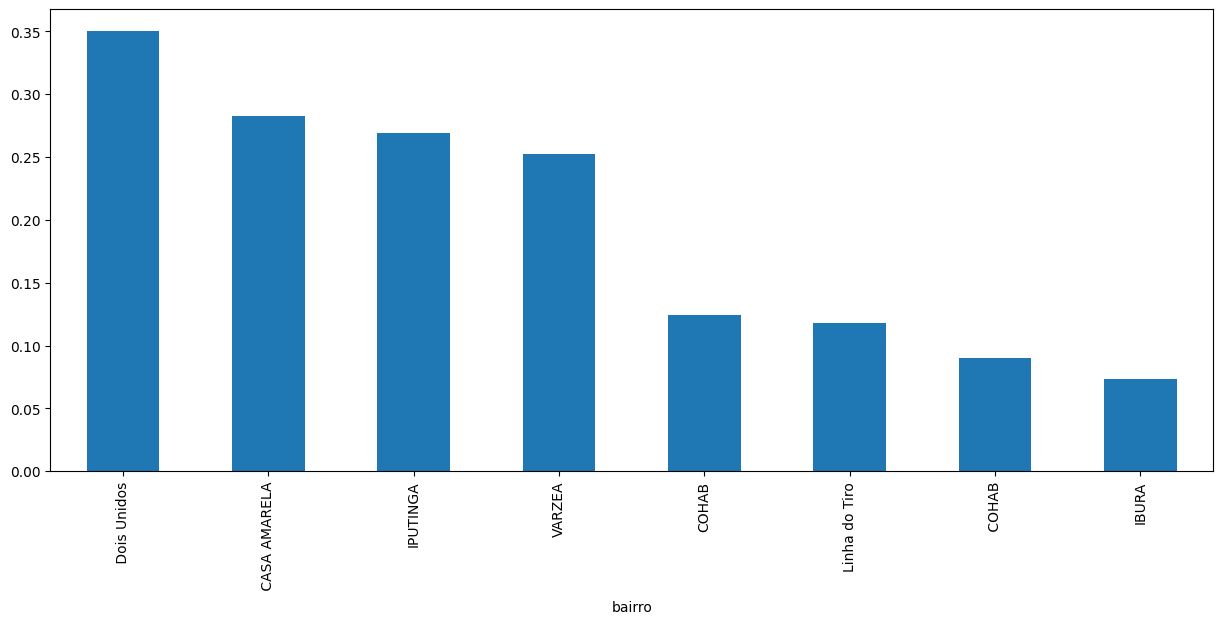

In [82]:
# Garantir que a coluna 'consultas' seja numérica
df['consultas'] = pd.to_numeric(df['consultas'], errors='coerce')

# Calcular a média e a mediana de atendimentos por bairro
media_consultas_por_bairro = df.groupby('bairro')['consultas'].mean()
mediana_consultas_por_bairro = df.groupby('bairro')['consultas'].median()

print("Média de consultas por bairro:")
display(media_consultas_por_bairro)

print("\nMediana de consultas por bairro:")
display(mediana_consultas_por_bairro)

# Plotar a mediana de consultas por bairro com largura aumentada, mostrando o top 10
mediana_consultas_por_bairro.sort_values(ascending=False).nlargest(10).plot.bar(figsize=(15, 6))

<H3><B>5 - Média de procedimentos por bairro</B></H3>

Média de procedimentos por bairro:


,procedimentos
bairro,
CASA AMARELA,0.371525
COHAB,0.196293
Dois Unidos,0.461291
COHAB,0.186160
IBURA,0.248470
IPUTINGA,0.338695
Linha do Tiro,0.270880
VARZEA,0.299924



Mediana de procedimentos por bairro:


,procedimentos
bairro,
CASA AMARELA,0.351257
COHAB,0.142349
Dois Unidos,0.475790
COHAB,0.209878
IBURA,0.107615
IPUTINGA,0.355101
Linha do Tiro,0.196911
VARZEA,0.290733


<Axes: xlabel='bairro'>

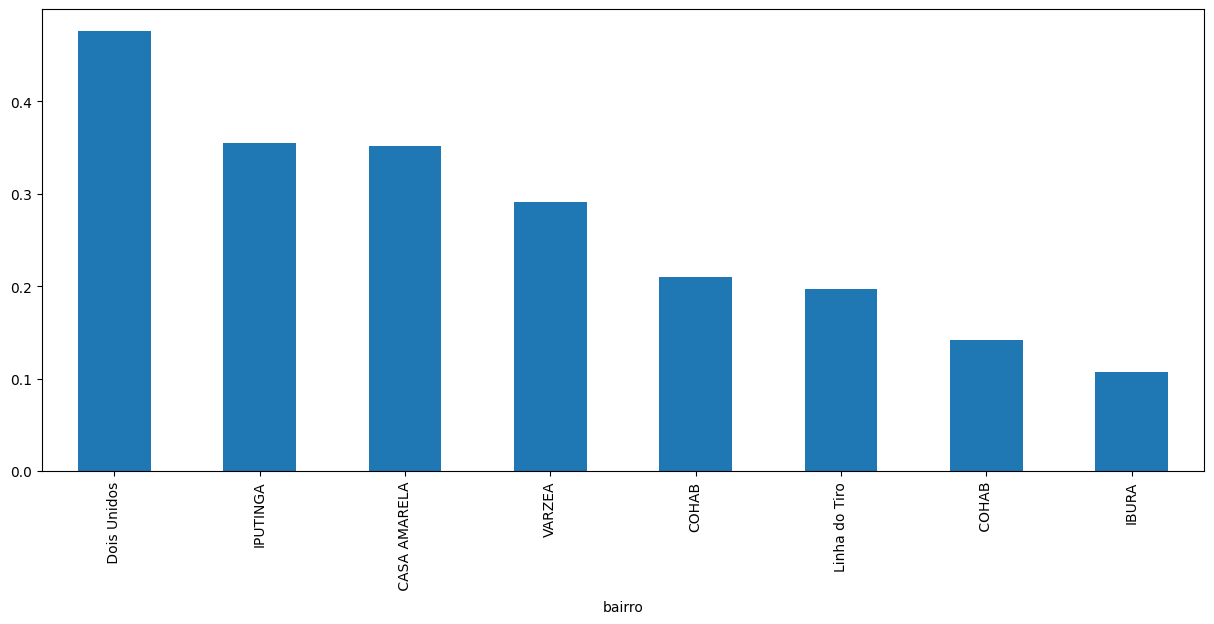

In [83]:
# Garantir que a coluna 'procedimentos' seja numérica
df['procedimentos'] = pd.to_numeric(df['procedimentos'], errors='coerce')

# Calcular a média e a mediana de atendimentos por bairro
media_procedimentos_por_bairro = df.groupby('bairro')['procedimentos'].mean()
mediana_procedimentos_por_bairro = df.groupby('bairro')['procedimentos'].median()

print("Média de procedimentos por bairro:")
display(media_procedimentos_por_bairro)

print("\nMediana de procedimentos por bairro:")
display(mediana_procedimentos_por_bairro)


# Plotar a mediana de procedimentos por bairro com largura aumentada, mostrando o top 10
mediana_procedimentos_por_bairro.sort_values(ascending=False).nlargest(10).plot.bar(figsize=(15, 6))

<H3><B>6 - Total de atendimentos por bairro</B></H3>

,0
bairro,
CAMPO GRANDE,4197.0
TORROES,17983.0
Dois Unidos,5555.0
AGUA FRIA,1320.0
ALTO JOSE BONIFACIO,24626.0
...,...
TORROES,15965.0
UR 07 VARZEA,26195.0
UR 1,15364.0


<Axes: xlabel='bairro'>

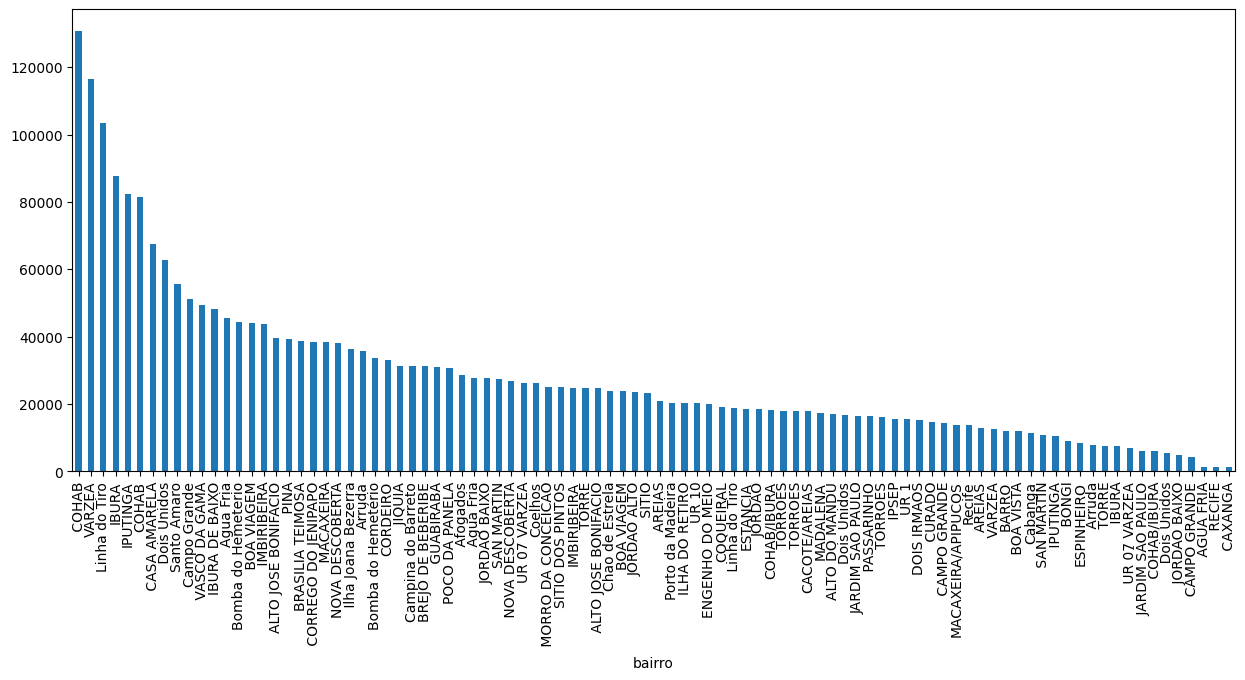

In [72]:
# Garantir que as colunas 'consultas' e 'procedimentos' sejam numéricas
df['consultas'] = pd.to_numeric(df['consultas'], errors='coerce')
df['procedimentos'] = pd.to_numeric(df['procedimentos'], errors='coerce')

# Calcular o total de atendimentos por bairro
total_por_bairro = df.groupby('bairro')[['consultas', 'procedimentos']].sum().sum(axis=1)


display(total_por_bairro)

total_por_bairro.sort_values(ascending=False).plot.bar(figsize=(15, 6))

<H3><B>7 - Removendo outliers utilizando método de tukey (univariado)</B></H3>

Número de linhas após a remoção de outliers (Tukey): 131


,_id,ine,equipe,cnes,usf,endereco,especialidade,consultas,tipo,procedimentos,atencao,periodo,rua,numero,bairro,cep
40,41,154520,Alto do Pascoal I,28649,US 276 PSF ALTO DO PASCOAL,"av Anibal Benevolo,S/N,Linha do Tiro, CEP:5213...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",4880.0,"Consulta Médica, Consulta Enfermagem, Consulta...",5244.0,Atenção Básica,Janeiro a Dezembro 2023,av Anibal Benevolo,S/N,Linha do Tiro,CEP:52130-220
41,42,154547,Alto do Pascoal II,28649,US 276 PSF ALTO DO PASCOAL,"av Anibal Benevolo,S/N,Linha do Tiro, CEP:5213...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",4230.0,"Consulta Médica, Consulta Enfermagem, Consulta...",6790.0,Atenção Básica,Janeiro a Dezembro 2023,av Anibal Benevolo,S/N,Linha do Tiro,CEP:52130-220
42,43,154555,Alto do Pascoal III,28649,US 276 PSF ALTO DO PASCOAL,"av Anibal Benevolo,S/N,Linha do Tiro, CEP:5213...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",5542.0,"Consulta Médica, Consulta Enfermagem, Consulta...",9138.0,Atenção Básica,Janeiro a Dezembro 2023,av Anibal Benevolo,S/N,Linha do Tiro,CEP:52130-220
43,44,154539,Alto do Pascoal IV,28649,US 276 PSF ALTO DO PASCOAL,"av Anibal Benevolo,S/N,Linha do Tiro, CEP:5213...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",4912.0,"Consulta Médica, Consulta Enfermagem, Consulta...",6953.0,Atenção Básica,Janeiro a Dezembro 2023,av Anibal Benevolo,S/N,Linha do Tiro,CEP:52130-220
53,54,155446,Clube dos Delegados I,3445275,US 327 PSF CLUBE DOS DELEGADOS,"Rua Joaquim Cavalcanti PEtribu, S/N, Dois Unid...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",3305.0,"Consulta Médica, Consulta Enfermagem, Consulta...",7255.0,Atenção Básica,Janeiro a Dezembro 2023,Rua Joaquim Cavalcanti PEtribu,S/N,Dois Unidos,CEP: 52160-230


<Axes: >

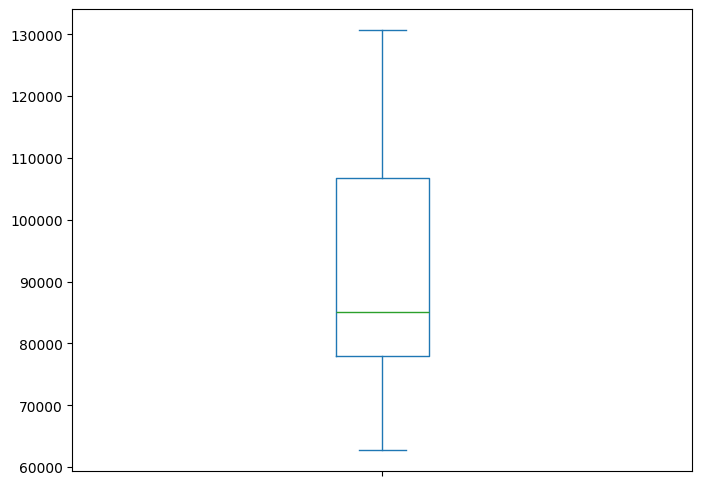

In [79]:
# Mapear os valores de total_por_bairro de volta para o DataFrame original.
df['total_atendimentos_bairro'] = df['bairro'].map(total_por_bairro)

# Calcular Q1, Q3 e IQR para o total_atendimentos_bairro
Q1 = df['total_atendimentos_bairro'].quantile(0.25)
Q3 = df['total_atendimentos_bairro'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferiores e superiores para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar o DataFrame para remover outliers baseado no método Tukey
df = df[(df['total_atendimentos_bairro'] >= lower_bound) & (df['total_atendimentos_bairro'] <= upper_bound)]

# excluir coluna temporaria
df = df.drop(columns=['total_atendimentos_bairro'])

print(f"Número de linhas após a remoção de outliers (Tukey): {len(df)}")

display(df.head())

# Recalcular o total_por_bairro após a remoção de outliers
total_por_bairro_filtered = df.groupby('bairro')[['consultas', 'procedimentos']].sum().sum(axis=1)

# Gerar a box plot do total atendimentos por bairro
total_por_bairro_filtered.plot.box(figsize=(8, 6))

### **8 - Normalização dos dados**

Vamos normalizar as colunas numéricas 'consultas' e 'procedimentos' usando a Normalização Min-Max.

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar as colunas numéricas para normalizar
col_numericas = ['consultas', 'procedimentos']

# Inicializar o scaler
scaler = MinMaxScaler()

# Aplicar a normalização
df[col_numericas] = scaler.fit_transform(df[col_numericas])

display(df.head())

,_id,ine,equipe,cnes,usf,endereco,especialidade,consultas,tipo,procedimentos,atencao,periodo,rua,numero,bairro,cep
40,41,154520,Alto do Pascoal I,28649,US 276 PSF ALTO DO PASCOAL,"av Anibal Benevolo,S/N,Linha do Tiro, CEP:5213...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",0.501347,"Consulta Médica, Consulta Enfermagem, Consulta...",0.372557,Atenção Básica,Janeiro a Dezembro 2023,av Anibal Benevolo,S/N,Linha do Tiro,CEP:52130-220
41,42,154547,Alto do Pascoal II,28649,US 276 PSF ALTO DO PASCOAL,"av Anibal Benevolo,S/N,Linha do Tiro, CEP:5213...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",0.434017,"Consulta Médica, Consulta Enfermagem, Consulta...",0.483621,Atenção Básica,Janeiro a Dezembro 2023,av Anibal Benevolo,S/N,Linha do Tiro,CEP:52130-220
42,43,154555,Alto do Pascoal III,28649,US 276 PSF ALTO DO PASCOAL,"av Anibal Benevolo,S/N,Linha do Tiro, CEP:5213...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",0.569919,"Consulta Médica, Consulta Enfermagem, Consulta...",0.652299,Atenção Básica,Janeiro a Dezembro 2023,av Anibal Benevolo,S/N,Linha do Tiro,CEP:52130-220
43,44,154539,Alto do Pascoal IV,28649,US 276 PSF ALTO DO PASCOAL,"av Anibal Benevolo,S/N,Linha do Tiro, CEP:5213...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",0.504661,"Consulta Médica, Consulta Enfermagem, Consulta...",0.495330,Atenção Básica,Janeiro a Dezembro 2023,av Anibal Benevolo,S/N,Linha do Tiro,CEP:52130-220
53,54,155446,Clube dos Delegados I,3445275,US 327 PSF CLUBE DOS DELEGADOS,"Rua Joaquim Cavalcanti PEtribu, S/N, Dois Unid...","Médico(a), Enfermeiro(a) e Técnico(a)de Enferm...",0.338202,"Consulta Médica, Consulta Enfermagem, Consulta...",0.517026,Atenção Básica,Janeiro a Dezembro 2023,Rua Joaquim Cavalcanti PEtribu,S/N,Dois Unidos,CEP: 52160-230


### **9 - Testes de Hipótese**

Vamos realizar um teste t independente para comparar a média de consultas entre dois tipos de atenção, por exemplo.

In [84]:
from scipy import stats

# Identificar os tipos presentes na coluna 'tipo'
tipos_disponiveis = df['tipo'].unique()
print(f"Tipos disponíveis para teste: {tipos_disponiveis}")

# Exemplo: comparar a média de 'consultas' entre os dois primeiros tipos disponíveis, se houver pelo menos dois
if len(tipos_disponiveis) >= 2:
    # Selecionar os dados para os dois primeiros tipos
    grupo1_tipo = tipos_disponiveis[0]
    grupo2_tipo = tipos_disponiveis[1]

    grupo1_data = df[df['tipo'] == grupo1_tipo]['consultas'].dropna() # Remove NaN para o teste
    grupo2_data = df[df['tipo'] == grupo2_tipo]['consultas'].dropna() # Remove NaN para o teste

    # Realizar o teste t independente apenas se ambos os grupos tiverem dados
    if len(grupo1_data) > 1 and len(grupo2_data) > 1: # Mínimo de 2 amostras por grupo para teste t
        ttest_result = stats.ttest_ind(grupo1_data, grupo2_data, equal_var=False) # Usando Welch's t-test (variâncias desiguais)

        print(f"\nResultado do Teste t independente entre '{grupo1_tipo}' e '{grupo2_tipo}':")
        print(f"Estatística t: {ttest_result.statistic}")
        print(f"Valor p: {ttest_result.pvalue}")

        # Interpretar o resultado (usando nível de significância alpha = 0.05)
        alpha = 0.05
        if ttest_result.pvalue < alpha:
            print(f"Com base no valor p ({ttest_result.pvalue:.3f}), rejeitamos a hipótese nula.")
            print(f"Há uma diferença estatisticamente significativa na média de consultas entre '{grupo1_tipo}' e '{grupo2_tipo}'.")
        else:
            print(f"Com base no valor p ({ttest_result.pvalue:.3f}), não rejeitamos a hipótese nula.")
            print(f"Não há evidência estatisticamente significativa de uma diferença na média de consultas entre '{grupo1_tipo}' e '{grupo2_tipo}'.")
    else:
        print(f"\nNão há dados suficientes em um ou ambos os grupos ('{grupo1_tipo}' e '{grupo2_tipo}') para realizar o teste t.")

else:
    print("\nNão há tipos suficientes na coluna 'tipo' nos dados filtrados para realizar um teste t entre dois grupos.")

Tipos disponíveis para teste: ['Consulta Médica, Consulta Enfermagem, Consulta Odontológica, Distribuição e Administração de Medicamentos, Vacinas, Curativos, Testes Rápidos, Procedimentos Odontológicos'
 'Consulta Médica, Consulta Enfermagem, Distribuição e Administração de Medicamentos, Vacinas, Curativos, Testes Rápidos,'
 'Consulta Médica, Consulta Enfermagem, Consulta Odontologica Distribuição e Administração de Medicamentos, Vacinas, Curativos, Testes Rápidos,']

Não há dados suficientes em um ou ambos os grupos ('Consulta Médica, Consulta Enfermagem, Consulta Odontológica, Distribuição e Administração de Medicamentos, Vacinas, Curativos, Testes Rápidos, Procedimentos Odontológicos' e 'Consulta Médica, Consulta Enfermagem, Distribuição e Administração de Medicamentos, Vacinas, Curativos, Testes Rápidos,') para realizar o teste t.
